In [439]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

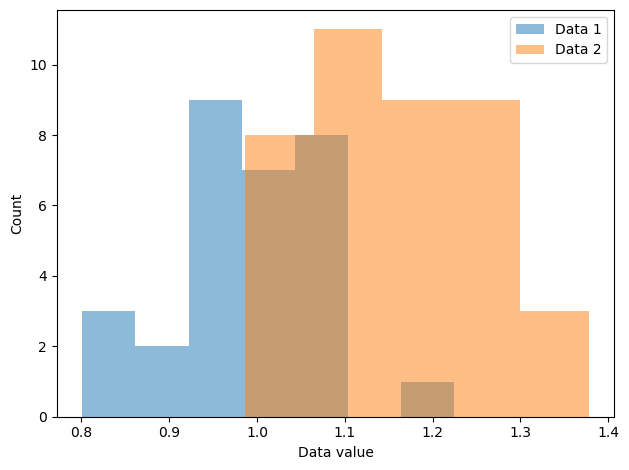

In [440]:
n1 = 30
n2 = 40
mu1 = 1
mu2 = 1.2

#data1 = mu1 + np.random.randn(n1)
#data2 = mu2 + np.random.randn(n2)

data1 = mu1 + np.random.randn(n1) / 10
data2 = mu2 + np.random.randn(n2) / 10

plt.hist(data1, bins='fd', alpha=0.5, label='Data 1')
plt.hist(data2, bins='fd', alpha=0.5, label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

In [441]:
t, p = stats.ttest_ind(data1, data2, equal_var=True)

df = n1 + n2 - 2
print(f't({df}) = {t:.5f}, p = {p:.5f}')

t(68) = -7.20252, p = 0.00000


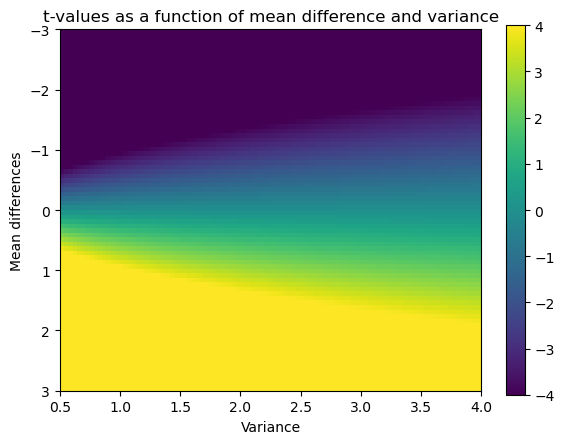

In [442]:
mean_diffs = np.linspace(-3, 3, 80)
pooled_var = np.linspace(0.5, 4, 100)

n1 = 40
n2 = 30

all_t_vals = np.zeros((len(mean_diffs), len(pooled_var)))

for mean_i in range(len(mean_diffs)):
    
    df = n1 + n2 -2
    s = np.sqrt(((n1 - 1) * pooled_var + (n2 - 1) * pooled_var) / df)
    t_den = s * np.sqrt(1 / n1 + 1 / n2)

    all_t_vals[mean_i] = mean_diffs[mean_i] / t_den
        
plt.imshow(all_t_vals, vmin=-4, vmax=4 ,extent=[pooled_var[0], pooled_var[-1], mean_diffs[-1], mean_diffs[0]], aspect=0.5)
plt.xticks(np.linspace(0.5, 4, 8))
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar(fraction=0.10)
plt.title('t-values as a function of mean difference and variance')

plt.show()

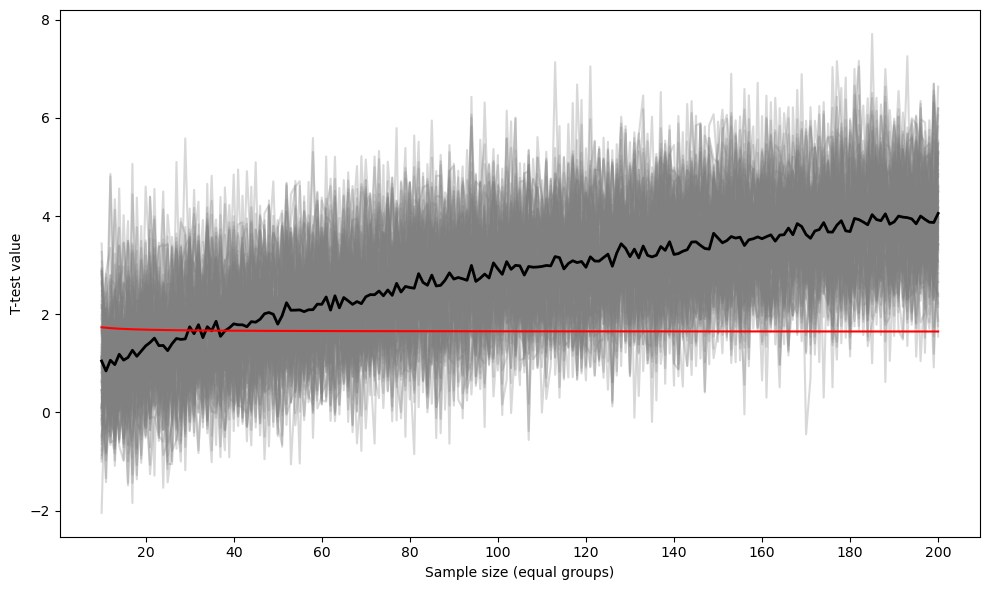

In [466]:
n = np.arange(10, 201)
num_exps = 100
pval_thresh = 0.05
pval_t_thresh = np.ones((len(n)))
mean1 = 1
mean2 = 1.4 
t_vals = np.ones((len(n), num_exps))

for i, data_size in enumerate(n):
    
        data1 = np.random.randn(data_size, num_exps) + mean1
        data2 = np.random.randn(data_size, num_exps) + mean2
        
        t_vals[i], p = stats.ttest_ind(data2, data1, equal_var=True, axis=0)
        pval_t_thresh[i] = stats.t.ppf(1 - pval_thresh, 2 * data_size - 2)

plt.figure(figsize=(10, 6))

plt.plot(n, t_vals, 'grey', alpha=0.3)
plt.plot(n, t_vals.mean(axis=1), 'k', linewidth=2)
plt.plot(n, pval_t_thresh, 'r')
plt.xlabel('Sample size (equal groups)')
plt.ylabel('T-test value')
plt.xticks(np.arange(20, 201, 20))

plt.tight_layout()
plt.show()